In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import random
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras import models

# Data Download 
Dependencies: PyDrive

In [ ]:
data_dir = '/content/drive/MyDrive/assets/data/WIDER'
try:
    os.stat(data_dir)
except:
    os.makedirs(data_dir)

os.chdir(data_dir)

In [ ]:
!gdown --id 15hGDLhsx8bLgLcIRD5DhYt5iBxnjNF1M
!gdown --id 1GUCogbp16PMGa39thoMMeWxp7Rp5oM8Q
!gdown --id 1HIfDbVEWKmsYKJZm4lchTBDLW5N7dY5T

Downloading...
From: https://drive.google.com/uc?id=1GUCogbp16PMGa39thoMMeWxp7Rp5oM8Q
To: /content/drive/My Drive/assets/data/WIDER/WIDER_val.zip
100% 363M/363M [00:07<00:00, 51.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1HIfDbVEWKmsYKJZm4lchTBDLW5N7dY5T
To: /content/drive/My Drive/assets/data/WIDER/WIDER_test.zip
100% 1.84G/1.84G [00:41<00:00, 44.5MB/s]


In [ ]:
!unzip WIDER_train.zip
!unzip WIDER_val.zip
!unzip WIDER_test.zip

Streaming output truncated to the last 5000 lines.
  inflating: WIDER_test/images/44--Aerobics/44_Aerobics_Aerobics_44_311.jpg  
  inflating: WIDER_test/images/44--Aerobics/44_Aerobics_Aerobics_44_312.jpg  
  inflating: WIDER_test/images/44--Aerobics/44_Aerobics_Aerobics_44_315.jpg  
  inflating: WIDER_test/images/44--Aerobics/44_Aerobics_Aerobics_44_32.jpg  
  inflating: WIDER_test/images/44--Aerobics/44_Aerobics_Aerobics_44_322.jpg  
  inflating: WIDER_test/images/44--Aerobics/44_Aerobics_Aerobics_44_325.jpg  
  inflating: WIDER_test/images/44--Aerobics/44_Aerobics_Aerobics_44_326.jpg  
  inflating: WIDER_test/images/44--Aerobics/44_Aerobics_Aerobics_44_33.jpg  
  inflating: WIDER_test/images/44--Aerobics/44_Aerobics_Aerobics_44_335.jpg  
  inflating: WIDER_test/images/44--Aerobics/44_Aerobics_Aerobics_44_341.jpg  
  inflating: WIDER_test/images/44--Aerobics/44_Aerobics_Aerobics_44_347.jpg  
  inflating: WIDER_test/images/44--Aerobics/44_Aerobics_Aerobics_44_354.jpg  
  inflating: WI

In [ ]:
!wget http://shuoyang1213.me/WIDERFACE/support/bbx_annotation/wider_face_split.zip
!unzip wider_face_split.zip

--2021-11-01 10:04:03--  http://shuoyang1213.me/WIDERFACE/support/bbx_annotation/wider_face_split.zip
Resolving shuoyang1213.me (shuoyang1213.me)... 192.30.252.153, 192.30.252.154
Connecting to shuoyang1213.me (shuoyang1213.me)|192.30.252.153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3591642 (3.4M) [application/zip]
Saving to: ‘wider_face_split.zip’

wider_face_split.zi 100%[===================>]   3.42M  4.99MB/s    in 0.7s    

2021-11-01 10:04:04 (4.99 MB/s) - ‘wider_face_split.zip’ saved [3591642/3591642]

Archive:  wider_face_split.zip
   creating: wider_face_split/
  inflating: wider_face_split/readme.txt  
  inflating: wider_face_split/wider_face_test.mat  
  inflating: wider_face_split/wider_face_test_filelist.txt  
  inflating: wider_face_split/wider_face_train.mat  
  inflating: wider_face_split/wider_face_train_bbx_gt.txt  
  inflating: wider_face_split/wider_face_val.mat  
  inflating: wider_face_split/wider_face_val_bbx_gt.txt  


# Preparation

In [ ]:
os.chdir(data_dir)
!git clone https://github.com/akofman/wider-face-pascal-voc-annotations.git

Cloning into 'wider-face-pascal-voc-annotations'...
remote: Enumerating objects: 16128, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 16128 (delta 0), reused 0 (delta 0), pack-reused 16125
Receiving objects: 100% (16128/16128), 6.07 MiB | 8.83 MiB/s, done.
Resolving deltas: 100% (15830/15830), done.
Checking out files: 100% (16114/16114), done.


In [ ]:
!python wider-face-pascal-voc-annotations/convert.py \
-ap ./wider_face_split/wider_face_train_bbx_gt.txt \
-tp ./WIDER_train_annotations/ -ip ./WIDER_train/images/

Streaming output truncated to the last 5000 lines.
4_Dancing_Dancing_4_552.jpg => ./WIDER_train_annotations/4_Dancing_Dancing_4_552.xml
4_Dancing_Dancing_4_913.jpg => ./WIDER_train_annotations/4_Dancing_Dancing_4_913.xml
4_Dancing_Dancing_4_271.jpg => ./WIDER_train_annotations/4_Dancing_Dancing_4_271.xml
4_Dancing_Dancing_4_178.jpg => ./WIDER_train_annotations/4_Dancing_Dancing_4_178.xml
4_Dancing_Dancing_4_65.jpg => ./WIDER_train_annotations/4_Dancing_Dancing_4_65.xml
4_Dancing_Dancing_4_786.jpg => ./WIDER_train_annotations/4_Dancing_Dancing_4_786.xml
4_Dancing_Dancing_4_22.jpg => ./WIDER_train_annotations/4_Dancing_Dancing_4_22.xml
4_Dancing_Dancing_4_226.jpg => ./WIDER_train_annotations/4_Dancing_Dancing_4_226.xml
4_Dancing_Dancing_4_215.jpg => ./WIDER_train_annotations/4_Dancing_Dancing_4_215.xml
4_Dancing_Dancing_4_522.jpg => ./WIDER_train_annotations/4_Dancing_Dancing_4_522.xml
4_Dancing_Dancing_4_237.jpg => ./WIDER_train_annotations/4_Dancing_Dancing_4_237.xml
4_Dancing_Dancing_

In [ ]:
!python wider-face-pascal-voc-annotations/convert.py \
-ap ./wider_face_split/wider_face_val_bbx_gt.txt \
-tp ./WIDER_val_annotations/ -ip ./WIDER_val/images/

0_Parade_marchingband_1_465.jpg => ./WIDER_val_annotations/0_Parade_marchingband_1_465.xml
0_Parade_Parade_0_628.jpg => ./WIDER_val_annotations/0_Parade_Parade_0_628.xml
0_Parade_marchingband_1_765.jpg => ./WIDER_val_annotations/0_Parade_marchingband_1_765.xml
0_Parade_Parade_0_194.jpg => ./WIDER_val_annotations/0_Parade_Parade_0_194.xml
0_Parade_marchingband_1_379.jpg => ./WIDER_val_annotations/0_Parade_marchingband_1_379.xml
0_Parade_Parade_0_814.jpg => ./WIDER_val_annotations/0_Parade_Parade_0_814.xml
0_Parade_Parade_0_470.jpg => ./WIDER_val_annotations/0_Parade_Parade_0_470.xml
0_Parade_marchingband_1_1045.jpg => ./WIDER_val_annotations/0_Parade_marchingband_1_1045.xml
0_Parade_marchingband_1_556.jpg => ./WIDER_val_annotations/0_Parade_marchingband_1_556.xml
0_Parade_Parade_0_829.jpg => ./WIDER_val_annotations/0_Parade_Parade_0_829.xml
0_Parade_marchingband_1_593.jpg => ./WIDER_val_annotations/0_Parade_marchingband_1_593.xml
0_Parade_Parade_0_29.jpg => ./WIDER_val_annotations/0_Par

## Source code

In [3]:
%cd /content/drive/MyDrive
#!git clone https://github.com/ngfuong/vedadet
%cd vedadet/ 
# !cp rcnn/sample_config.py rcnn/config.py
vedadet_root='/content/drive/MyDrive/vedadet'

/content/drive/MyDrive
/content/drive/MyDrive/vedadet


In [4]:
!pip install -r requirements/build.txt
!pip install -v -e .

Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.purelib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.headers does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
Value for scheme.scripts does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/bin
sysconfig: /usr/bin
Value for scheme.data does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local
sysconfig: /usr
Additional context:
user = False
home

## Data
Organize WIDER face data as follow:
```
vedadet
├── vedadet
├── vedacore
├── tools
├── configs
├── data
│   ├── WIDERFace
│   │   ├── WIDER_train
│   │   │   ├── 0--Parade
│   │   │   ├── ......
│   │   │   ├── 61--Street_Battle
│   │   │   ├── Annotations
│   │   ├── WIDER_val
│   │   │   ├── 0--Parade
│   │   │   ├── ......
│   │   │   ├── 61--Street_Battle
│   │   │   ├── Annotations
```

In [ ]:
!mkdir /content/drive/MyDrive/vedadet/data

In [ ]:
!cp -rf /content/drive/MyDrive/assets/data/WIDER/ /content/drive/MyDrive/vedadet/data/WIDERFace
os.chdir("/content/drive/MyDrive/vedadet/data/WIDERFace")
!ls

imagenet-resnet-50		   WIDER_train
wider-face-pascal-voc-annotations  WIDER_train_annotations
wider_face_split		   WIDER_train.zip
wider_face_split.zip		   WIDER_val
WIDER_test			   WIDER_val_annotations
WIDER_test.zip			   WIDER_val.zip


In [ ]:
!cp -rf WIDER_train/images/* WIDER_train/
!cp -rf WIDER_train_annotations WIDER_train/Annotations
!ls WIDER_train

0--Parade	      29--Students_Schoolkids  48--Parachutist_Paratrooper
10--People_Marching   2--Demonstration	       49--Greeting
11--Meeting	      30--Surgeons	       4--Dancing
12--Group	      31--Waiter_Waitress      50--Celebration_Or_Party
13--Interview	      32--Worker_Laborer       51--Dresses
14--Traffic	      33--Running	       52--Photographers
15--Stock_Market      34--Baseball	       53--Raid
16--Award_Ceremony    35--Basketball	       54--Rescue
17--Ceremony	      36--Football	       55--Sports_Coach_Trainer
18--Concerts	      37--Soccer	       56--Voter
19--Couple	      38--Tennis	       57--Angler
1--Handshaking	      39--Ice_Skating	       58--Hockey
20--Family_Group      3--Riot		       59--people--driving--car
21--Festival	      40--Gymnastics	       5--Car_Accident
22--Picnic	      41--Swimming	       61--Street_Battle
23--Shoppers	      42--Car_Racing	       6--Funeral
24--Soldier_Firing    43--Row_Boat	       7--Cheering
25--Soldier_Patrol    44--Aerobics	       8--E

In [ ]:
!cp -rf WIDER_val/images/* WIDER_val/
!cp -rf WIDER_val_annotations WIDER_val/Annotations
!rm -rf WIDER_val/images
!ls WIDER_train

0--Parade	      29--Students_Schoolkids  48--Parachutist_Paratrooper
10--People_Marching   2--Demonstration	       49--Greeting
11--Meeting	      30--Surgeons	       4--Dancing
12--Group	      31--Waiter_Waitress      50--Celebration_Or_Party
13--Interview	      32--Worker_Laborer       51--Dresses
14--Traffic	      33--Running	       52--Photographers
15--Stock_Market      34--Baseball	       53--Raid
16--Award_Ceremony    35--Basketball	       54--Rescue
17--Ceremony	      36--Football	       55--Sports_Coach_Trainer
18--Concerts	      37--Soccer	       56--Voter
19--Couple	      38--Tennis	       57--Angler
1--Handshaking	      39--Ice_Skating	       58--Hockey
20--Family_Group      3--Riot		       59--people--driving--car
21--Festival	      40--Gymnastics	       5--Car_Accident
22--Picnic	      41--Swimming	       61--Street_Battle
23--Shoppers	      42--Car_Racing	       6--Funeral
24--Soldier_Firing    43--Row_Boat	       7--Cheering
25--Soldier_Patrol    44--Aerobics	       8--E

In [ ]:
%%bash
chmod +x ./configs/trainval/tinaface/gen_xml_name_txt.sh
./configs/trainval/tinaface/gen_xml_name_txt.sh

In [ ]:
!wget http://shuoyang1213.me/WIDERFACE/support/eval_script/eval_tools.zip
!unzip eval_tools
!ls eval_tools

--2021-11-04 06:47:46--  http://shuoyang1213.me/WIDERFACE/support/eval_script/eval_tools.zip
Resolving shuoyang1213.me (shuoyang1213.me)... 192.30.252.153, 192.30.252.154
Connecting to shuoyang1213.me (shuoyang1213.me)|192.30.252.153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8357459 (8.0M) [application/zip]
Saving to: ‘eval_tools.zip’

eval_tools.zip      100%[===================>]   7.97M  13.4MB/s    in 0.6s    

2021-11-04 06:47:47 (13.4 MB/s) - ‘eval_tools.zip’ saved [8357459/8357459]

Archive:  eval_tools.zip
   creating: eval_tools/
  inflating: eval_tools/.DS_Store    
   creating: __MACOSX/
   creating: __MACOSX/eval_tools/
  inflating: __MACOSX/eval_tools/._.DS_Store  
   creating: eval_tools/plot/
  inflating: eval_tools/plot/saveTightFigure.m  
   creating: __MACOSX/eval_tools/plot/
  inflating: __MACOSX/eval_tools/plot/._saveTightFigure.m  
  inflating: eval_tools/plot/.DS_Store  
  inflating: __MACOSX/eval_tools/plot/._.DS_Store  
  inflating

# Train

In [ ]:
# view gpus
!nvidia-smi

Thu Nov  4 07:00:46 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!CUDA_VISIBLE_DEVICES="0" python tools/trainval.py configs/trainval/tinaface/tinaface_r50_fpn_bn.py

2021-11-04 07:07:10,340 - vedadet - WARNING - EvalHook is not in modes ['train']
2021-11-04 07:07:10,350 - vedadet - INFO - Loading weights from torchvision://resnet50
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100% 97.8M/97.8M [00:00<00:00, 112MB/s]
2021-11-04 07:07:11,458 - vedadet - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: backbone.fc.weight, backbone.fc.bias

missing keys in source state_dict: neck.0.lateral_convs.0.conv.weight, neck.0.lateral_convs.0.bn.weight, neck.0.lateral_convs.0.bn.bias, neck.0.lateral_convs.0.bn.running_mean, neck.0.lateral_convs.0.bn.running_var, neck.0.lateral_convs.1.conv.weight, neck.0.lateral_convs.1.bn.weight, neck.0.lateral_convs.1.bn.bias, neck.0.lateral_convs.1.bn.running_mean, neck.0.lateral_convs.1.bn.running_var, neck.0.lateral_convs.2.conv.weight, neck.0.lateral_convs.2.bn.weight, neck.0.lateral_co

# Test

Epoch 1

In [ ]:
os.environ["weight_path"] = "./workdir/tinaface_r50_fpn_bn/epoch_1_weights.pth"
!python configs/trainval/tinaface/test_widerface.py configs/trainval/tinaface/tinaface_r50_fpn_bn.py ${weight_path}

[                                                  ] 0/3226, elapsed: 0s, ETA:/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
[  ] 3/3226, 0.5 task/s, elapsed: 6s, ETA:  5993stcmalloc: large alloc 1122508800 bytes == 0x558546e5e000 @  0x7fcb98e9c887 0x7fca81f82162 0x7fca81f81d09 0x7fca

Epoch 10

In [ ]:
os.environ["weight_path"] = "./workdir/tinaface_r50_fpn_bn/epoch_10_weights.pth"
!python configs/trainval/tinaface/test_widerface.py configs/trainval/tinaface/tinaface_r50_fpn_bn.py ${weight_path}

[                                                  ] 0/3226, elapsed: 0s, ETA:/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
tcmalloc: large alloc 1242144768 bytes == 0x5648b0350000 @  0x7f12f028e887 0x7f11d9374162 0x7f11d9373d09 0x7f11d9373378 0x7f11d9372005 0x7f11d9370c91 0x7f11d936

# Infer + Classification

In [39]:
img_path = "/content/drive/MyDrive/vedadet/data/WIDERFace/WIDER_test/images/12--Group/12_Group_Group_12_Group_Group_12_103.jpg"
os.chdir("/content/drive/MyDrive/vedadet/")
os.environ["img_path"] = img_path
!CUDA_VISIBLE_DEVICES="0" python tools/infer.py configs/infer/tinaface/tinaface_r50_fpn_bn.py $img_path

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
Time elapsed: 0.1985 seconds


In [40]:
from vedacore.image import imread, imwrite

boxes = np.load(img_path[:-4] + "_out.npy")
img = imread(img_path, flag='grayscale')

faces = []
for result in boxes.squeeze():
    X1, Y1, X2, Y2, conf = result
    X1, Y1, X2, Y2 = X1.astype(np.int32), Y1.astype(np.int32), X2.astype(np.int32), Y2.astype(np.int32)
    width = X2-X1 if (X2-X1)>=Y2-Y1 else Y2-Y1
    cropped_image = img[Y1:Y1+width, X1:X1+width]
    # print([X,Y,W,H])
    faces.append(cropped_image)
    # cv2.imwrite('contour1.png', cropped_image)

## Load model

In [53]:
!ls /content/drive/MyDrive/emotion-classification/checkpoints/

ple_oct29_2-expressions.hdf5  ple_oct29_3-expressions.hdf5


In [54]:
from keras import models

ckpt_path = "/content/drive/MyDrive/emotion-classification/checkpoints/ple_oct29_3-expressions.hdf5"
ckpt_model = models.load_model(ckpt_path)
ckpt_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 4096)              0

## Classification

In [51]:
selected_emotions = {0: 'Happy',
                     1: 'Sad',
                     2: 'Neutral'
                     }

[0.08020172 0.26133016 0.6584682 ]
[0.17532048 0.20234218 0.62233734]
[0.05784886 0.36620903 0.5759421 ]
[0.09368402 0.57294947 0.33336654]


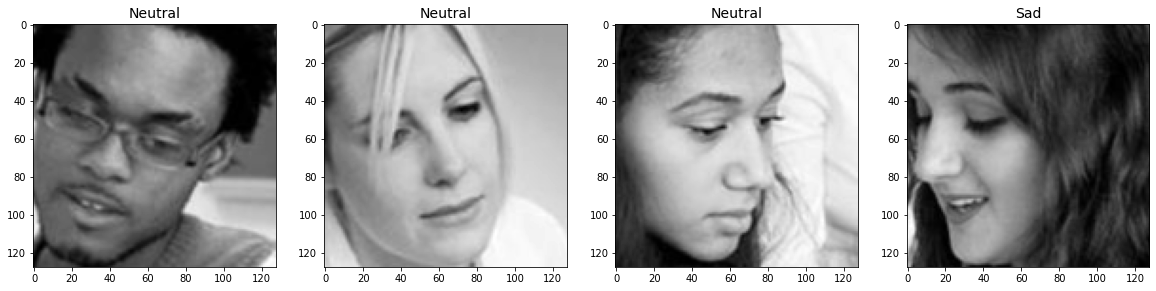

In [57]:
import cv2
fig=plt.figure(figsize=(20, 35))
columns = len(faces); rows = 1
num = 1
predictions = []
for face in faces:
    image = cv2.resize(face, dsize=(48, 48)).astype('float32')/255
    # image = np.expand_dims(image, axis=2)
    image = np.expand_dims(image, axis=0)
                           
    fig.add_subplot(rows, columns, num)
    num += 1

    predict = ckpt_model.predict(image)[0]
    print(predict)
    predictions.append(predict)
    plt.title(selected_emotions[np.argmax(predict)],fontsize=14)
    plt.imshow(cv2.resize(face, dsize=(128,128)), cmap=plt.get_cmap('gray'))

In [58]:
confidences = [[]]*3
for pred in predictions:
    idx_max = np.argmax(pred)
    confidences[idx_max].append(pred[idx_max])

def get_avg(ls):
    return sum(ls)/len(ls)

print(f"Confidence score: Happy={get_avg(confidences[0])}\tSad={get_avg(confidences[1])}\tNeutral={get_avg(confidences[2])}")

Confidence score: Happy=0.6074242740869522	Sad=0.6074242740869522	Neutral=0.6074242740869522
